# Imports

In [57]:
import pandas as pd
import numpy as np
import optuna
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet


import logging

# Definir o nível de log para WARNING
optuna.logging.set_verbosity(optuna.logging.WARNING)
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

import warnings

# Ignora avisos de depreciação específicos
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


# Helper Functions

In [46]:
def calculate_metrics(y_true, y_pred, model_name):
    # Calcular R2
    r2 = r2_score(y_true, y_pred)
    
    # Calcular MSE
    mse = mean_squared_error(y_true, y_pred)
    
    # Calcular RMSE
    rmse = np.sqrt(mse)
    
    # Calcular MAE
    mae = mean_absolute_error(y_true, y_pred)
    
    # Calcular MAPE
    y_true_arr, y_pred_arr = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true_arr - y_pred_arr) / y_true_arr))
    
    return {
        "model_name": model_name,
        "R2": r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE": mape
    }


# Data load

In [4]:
# Dados de Treinamento
X_train = pd.read_csv('../../data/Regressao/X_training.csv')
y_train = pd.read_csv('../../data/Regressao/y_training.csv').values.ravel()

# Dados de Test
X_test = pd.read_csv('../../data/Regressao/X_test.csv')
y_test = pd.read_csv('../../data/Regressao/y_test.csv').values.ravel()

# Dados de Validacao
X_val = pd.read_csv('../../data/Regressao/X_validation.csv')
y_val = pd.read_csv('../../data/Regressao/y_val.csv').values.ravel()

# Machine Learning

## Decision Tree Regression

In [5]:
def dt_fine_tuning(trial):
    max_depth = trial.suggest_int('max_depth', 2,100)
    dt_model = DecisionTreeRegressor(max_depth=max_depth)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_val)

    return calculate_metrics(y_val, y_pred, 'Decision Tree')['RMSE']


In [6]:
study = optuna.create_study(direction='minimize')
study.optimize(dt_fine_tuning, n_trials=100)

In [7]:
optuna.visualization.plot_optimization_history(study)

In [8]:
dt_best_params = study.best_params
dt_best_params

{'max_depth': 5}

## Random Forest Regressor

In [9]:
def rf_fine_tuning(trial):
    n_estimators = trial.suggest_int('n_estimators', 10,200)
    max_depth = trial.suggest_int('max_depth', 2,50)
    rf_model = RandomForestRegressor(n_estimators = n_estimators, max_depth=max_depth)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_val)

    return calculate_metrics(y_val, y_pred, 'Random Forest')['RMSE']

In [10]:
study = optuna.create_study(direction='minimize')
study.optimize(rf_fine_tuning, n_trials=10)

In [11]:
optuna.visualization.plot_optimization_history(study)

In [12]:
rf_best_params = study.best_params
rf_best_params

{'n_estimators': 185, 'max_depth': 28}

## Polinomial Regression

In [13]:
# poly = PolynomialFeatures(degree=5)
# poly_features = poly.fit_transform(X_train)
# X_poly_val = poly.transform(X_val)

# model = LinearRegression()
# model.fit(poly_features, y_train)
# y_pred = model.predict(X_poly_val)


In [14]:
def pol_reg_fine_tuning(trial):
    degree = trial.suggest_int('degree', 2,4)

    poly = PolynomialFeatures(degree=degree)
    poly_features = poly.fit_transform(X_train)
    X_poly_val = poly.transform(X_val)

    model = LinearRegression()
    model.fit(poly_features, y_train)
    y_pred = model.predict(X_poly_val)

    return calculate_metrics(y_val, y_pred, 'Polinomial Regression')['RMSE']


In [15]:
study = optuna.create_study(direction='minimize')
study.optimize(pol_reg_fine_tuning, n_trials=5)

In [16]:
optuna.visualization.plot_optimization_history(study)

In [17]:
pol_best_params = study.best_params
pol_best_params

{'degree': 2}

## Lasso

In [18]:
def lasso_fine_tuning(trial):
    #degree = trial.suggest_int('degree', 2,4)
    alpha = trial.suggest_float('alpha', 0.1,5.0)
    #l1_ratio = trial.suggest_int('l1_ratio', 1,10)
    max_iter = trial.suggest_int('max_iter', 500,3000)

    model_lasso = Lasso(alpha = alpha, max_iter = max_iter)
    model_lasso.fit(X_train, y_train)

    y_pred = model_lasso.predict(X_val)

    return calculate_metrics(y_val, y_pred, 'Lasso')['RMSE']


In [19]:
study = optuna.create_study(direction='minimize')
study.optimize(lasso_fine_tuning, n_trials=500)

In [20]:
optuna.visualization.plot_optimization_history(study)

In [21]:
lasso_best_params = study.best_params
lasso_best_params

{'alpha': 0.10001960582461196, 'max_iter': 2138}

## Ridge

In [22]:
def ridge_fine_tuning(trial):
    #degree = trial.suggest_int('degree', 2,4)
    alpha = trial.suggest_float('alpha', 0.1,5.0)
    #l1_ratio = trial.suggest_int('l1_ratio', 1,10)
    max_iter = trial.suggest_int('max_iter', 500,3000)

    model_ridge = Ridge(alpha = alpha, max_iter = max_iter)
    model_ridge.fit(X_train, y_train)

    y_pred = model_ridge.predict(X_val)

    return calculate_metrics(y_val, y_pred, 'Lasso')['RMSE']


In [23]:
study = optuna.create_study(direction='minimize')
study.optimize(ridge_fine_tuning, n_trials=500)

In [24]:
optuna.visualization.plot_optimization_history(study)

In [25]:
ridge_best_params = study.best_params
ridge_best_params

{'alpha': 4.999987486600811, 'max_iter': 761}

## Elastic Net

In [26]:
def elasticnet_fine_tuning(trial):
    #degree = trial.suggest_int('degree', 2,4)
    alpha = trial.suggest_float('alpha', 0.1,5.0)
    l1_ratio = trial.suggest_int('l1_ratio', 0,1)
    max_iter = trial.suggest_int('max_iter', 500,3000)

    model_elasticnet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=max_iter)
    model_elasticnet.fit(X_train, y_train)

    y_pred = model_elasticnet.predict(X_val)

    return calculate_metrics(y_val, y_pred, 'Lasso')['RMSE']


In [27]:
study = optuna.create_study(direction='minimize')
study.optimize(elasticnet_fine_tuning, n_trials=10)

In [28]:
optuna.visualization.plot_optimization_history(study)

In [29]:
elastic_best_params = study.best_params
elastic_best_params

{'alpha': 0.33429279941592943, 'l1_ratio': 1, 'max_iter': 2594}

# All Results

In [47]:
model_elasticnet = ElasticNet(alpha=elastic_best_params['alpha'], l1_ratio=elastic_best_params['l1_ratio'], max_iter=elastic_best_params['max_iter'])
model_ridge = Ridge(alpha = ridge_best_params['alpha'], max_iter = ridge_best_params['max_iter'])
model_lasso = Lasso(alpha = lasso_best_params['alpha'], max_iter = lasso_best_params['max_iter'])
rf_model = RandomForestRegressor(n_estimators = rf_best_params['n_estimators'], max_depth=rf_best_params['max_depth'])
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'])



In [48]:
model_elasticnet.fit(X_train, y_train)
model_ridge.fit(X_train, y_train)
model_lasso.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [49]:
model_list = [model_elasticnet, model_ridge, model_lasso, rf_model, dt_model]
model_names = ['ElasticNet', 'Ridge', 'Lasso', 'Random Forest', 'Decision Tree']

# Nos dados de Treinamento
train_dataset = pd.DataFrame()
test_dataset = pd.DataFrame()
val_dataset = pd.DataFrame()

In [50]:
for model, model_name in zip(model_list, model_names):
    y_pred = model.predict(X_train)
    results = calculate_metrics(y_train, y_pred, model_name)
    train_dataset = pd.concat([train_dataset, pd.DataFrame([results])])
train_dataset['Dataset'] = 'Train'
train_dataset

,model_name,R2,MSE,RMSE,MAE,MAPE,Dataset
0,ElasticNet,0.017757,469.524320,21.668510,17.221129,8.702231,Train
0,Ridge,0.046045,456.002667,21.354219,16.998596,8.654275,Train
0,Lasso,0.041217,458.310185,21.408180,17.046789,8.667964,Train
0,Random Forest,0.904418,45.689508,6.759401,4.848931,2.623909,Train
0,Decision Tree,0.113523,423.747268,20.585122,16.368766,7.869536,Train


In [58]:
# Nos dados de Validation
for model, model_name in zip(model_list, model_names):
    print(model_name)
    y_pred = model.predict(np.array(X_val))
    results = calculate_metrics(y_val, y_pred, model_name)
    val_dataset = pd.concat([val_dataset, pd.DataFrame([results])])
val_dataset['Dataset'] = 'Validation'
val_dataset

ElasticNet
Ridge
Lasso
Random Forest
Decision Tree


,model_name,R2,MSE,RMSE,MAE,MAPE,Dataset
0,ElasticNet,0.016887,469.448005,21.666749,17.180003,8.677335,Validation
0,Ridge,0.039936,458.441514,21.411247,17.038532,8.681918,Validation
0,Lasso,0.037194,459.750945,21.441804,17.047454,8.686901,Validation
0,Random Forest,0.334890,317.597588,17.821268,12.999110,7.072808,Validation
0,Decision Tree,0.063559,447.161319,21.146189,16.843452,8.395778,Validation
0,ElasticNet,0.016887,469.448005,21.666749,17.180003,8.677335,Validation
0,Ridge,0.039936,458.441514,21.411247,17.038532,8.681918,Validation
0,Lasso,0.037194,459.750945,21.441804,17.047454,8.686901,Validation
0,Random Forest,0.334890,317.597588,17.821268,12.999110,7.072808,Validation
0,Decision Tree,0.063559,447.161319,21.146189,16.843452,8.395778,Validation


In [59]:
for model, model_name in zip(model_list, model_names):
    print(model_name)
    y_pred = model.predict(np.array(X_test))
    results = calculate_metrics(y_test, y_pred, model_name)
    test_dataset = pd.concat([test_dataset, pd.DataFrame([results])])
test_dataset['Dataset'] = 'Test'
test_dataset

ElasticNet
Ridge
Lasso
Random Forest
Decision Tree


,model_name,R2,MSE,RMSE,MAE,MAPE,Dataset
0,ElasticNet,0.019338,477.485393,21.851439,17.361042,8.696786,Test
0,Ridge,0.052265,461.452970,21.481456,17.128819,8.526457,Test
0,Lasso,0.044726,465.123906,21.566731,17.175617,8.592956,Test
0,Random Forest,0.353594,314.735828,17.740796,13.034271,6.596408,Test
0,Decision Tree,0.072181,451.755789,21.254547,17.010757,7.833952,Test
0,ElasticNet,0.019338,477.485393,21.851439,17.361042,8.696786,Test
0,Ridge,0.052265,461.452970,21.481456,17.128819,8.526457,Test
0,Lasso,0.044726,465.123906,21.566731,17.175617,8.592956,Test
0,Random Forest,0.353594,314.735828,17.740796,13.034271,6.596408,Test
0,Decision Tree,0.072181,451.755789,21.254547,17.010757,7.833952,Test


# Join Results

In [60]:
full_results = pd.concat([train_dataset, val_dataset, test_dataset])
full_results

,model_name,R2,MSE,RMSE,MAE,MAPE,Dataset
0,ElasticNet,0.017757,469.524320,21.668510,17.221129,8.702231,Train
0,Ridge,0.046045,456.002667,21.354219,16.998596,8.654275,Train
0,Lasso,0.041217,458.310185,21.408180,17.046789,8.667964,Train
0,Random Forest,0.904418,45.689508,6.759401,4.848931,2.623909,Train
0,Decision Tree,0.113523,423.747268,20.585122,16.368766,7.869536,Train
0,ElasticNet,0.016887,469.448005,21.666749,17.180003,8.677335,Validation
0,Ridge,0.039936,458.441514,21.411247,17.038532,8.681918,Validation
0,Lasso,0.037194,459.750945,21.441804,17.047454,8.686901,Validation
0,Random Forest,0.334890,317.597588,17.821268,12.999110,7.072808,Validation
0,Decision Tree,0.063559,447.161319,21.146189,16.843452,8.395778,Validation


## Comparing Performance

In [61]:
list_datasets = np.unique(full_results['Dataset'])
for i in list_datasets:
    subset = full_results.loc[full_results['Dataset'] == i]

In [62]:
subset

,model_name,R2,MSE,RMSE,MAE,MAPE,Dataset
0,ElasticNet,0.016887,469.448005,21.666749,17.180003,8.677335,Validation
0,Ridge,0.039936,458.441514,21.411247,17.038532,8.681918,Validation
0,Lasso,0.037194,459.750945,21.441804,17.047454,8.686901,Validation
0,Random Forest,0.334890,317.597588,17.821268,12.999110,7.072808,Validation
0,Decision Tree,0.063559,447.161319,21.146189,16.843452,8.395778,Validation
0,ElasticNet,0.016887,469.448005,21.666749,17.180003,8.677335,Validation
0,Ridge,0.039936,458.441514,21.411247,17.038532,8.681918,Validation
0,Lasso,0.037194,459.750945,21.441804,17.047454,8.686901,Validation
0,Random Forest,0.334890,317.597588,17.821268,12.999110,7.072808,Validation
0,Decision Tree,0.063559,447.161319,21.146189,16.843452,8.395778,Validation


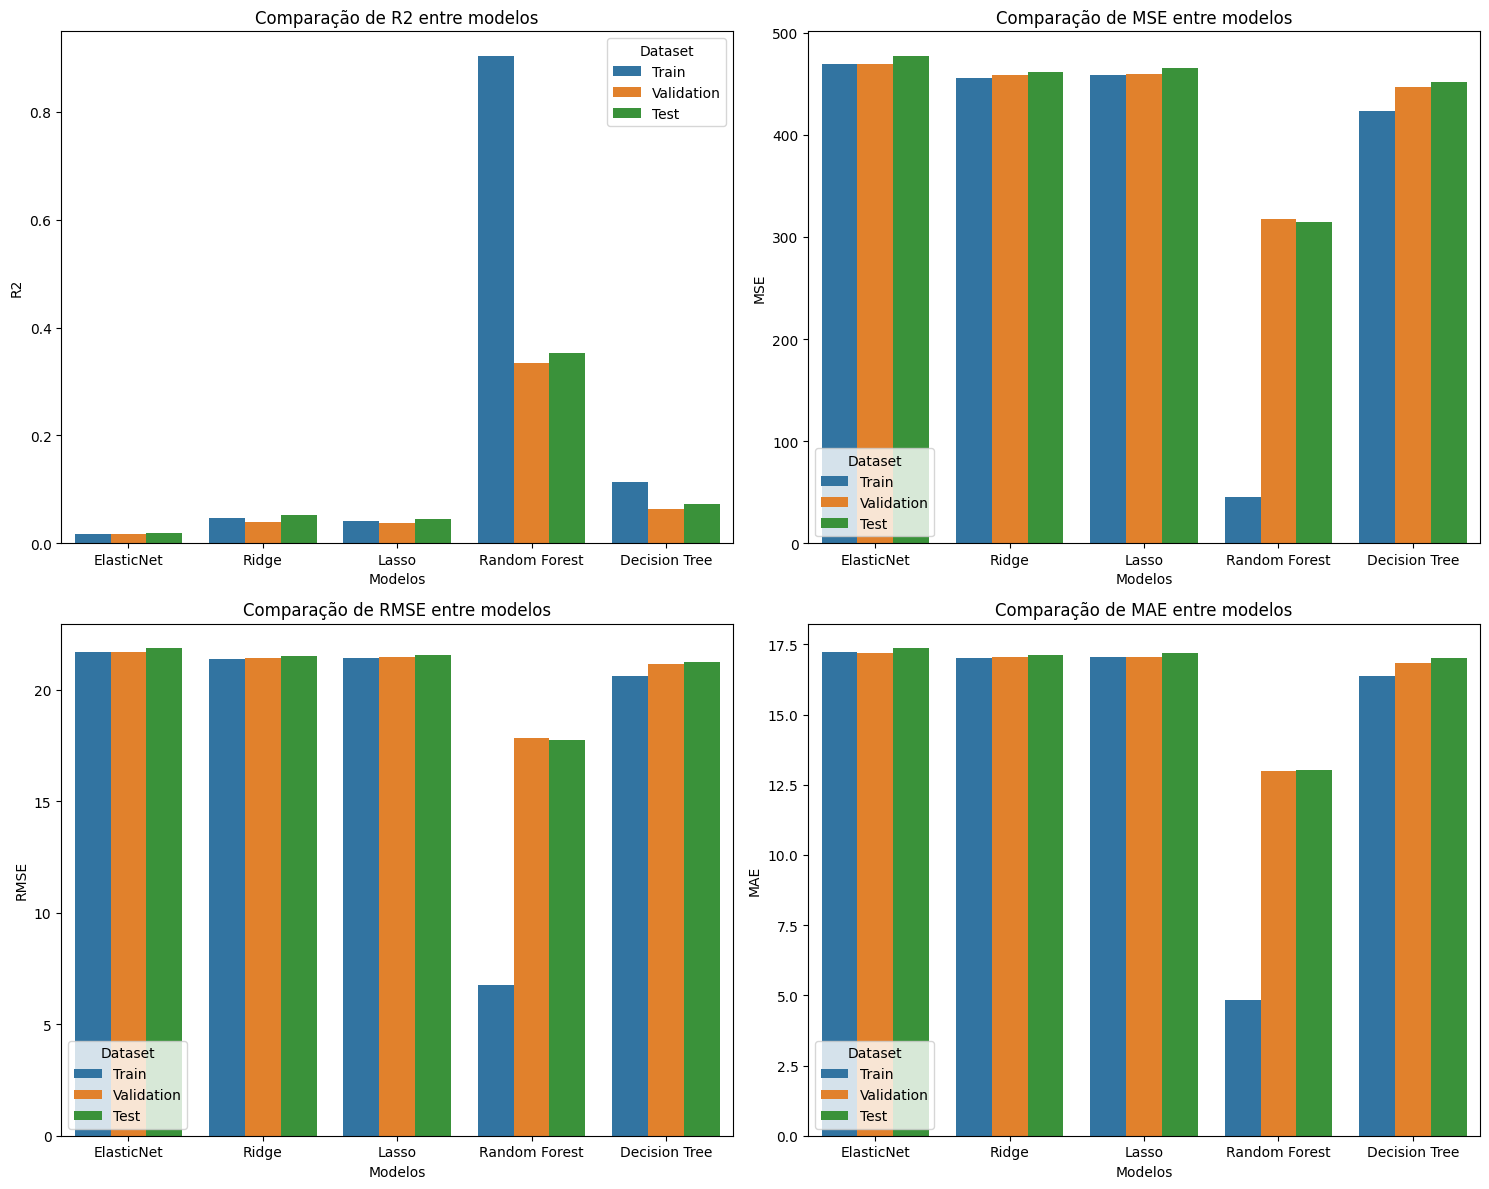

In [63]:
# Criar subplots de 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

metrics = ["R2", "MSE", "RMSE", "MAE", "MAPE"]
for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(x="model_name", y=metric, hue="Dataset", data=full_results, ax=ax)
    ax.set_title(f'Comparação de {metric} entre modelos')
    ax.set_ylabel(metric)
    ax.set_xlabel("Modelos")

plt.tight_layout()
plt.show()